In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import functools

In [101]:
image = cv2.imread('D:/Bui Tuan/License Plate Recognition (NDBSX)/plate_car/plate_car/00003526_92C12684.jpg.jpg')
cv2.imshow('image',image)



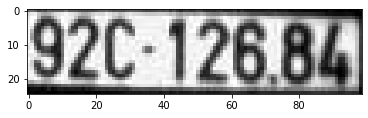

In [102]:
plt.imshow(image)
plt.show()

In [105]:
image.shape

(107, 422, 3)

In [103]:
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

In [104]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [106]:
gray.shape

(107, 422)

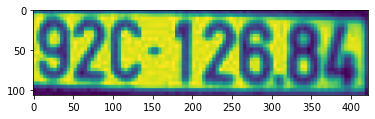

In [108]:
plt.imshow(gray)

In [87]:
image1 = cv2.imread('D:/Bui Tuan/Iopen.jpg')

In [78]:
imag.dtype

dtype('uint8')

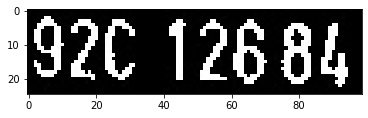

In [89]:
plt.imshow(imag)
plt.show()

In [90]:
imag.dtype

dtype('uint8')

In [91]:
imag.shape

(25, 99, 3)

In [97]:
dim = (422,107)

In [98]:
imag = cv2.resize(imag, dim, interpolation = cv2.INTER_AREA)

In [99]:
imag.shape

(107, 422, 3)

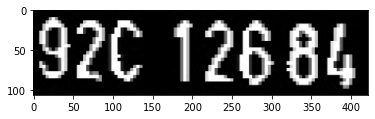

In [100]:
plt.imshow(imag)
plt.show()

In [109]:
# Apply Gaussian blurring and thresholding 
# to reveal the characters on the license plate
#sử dụng gaussian và ngưỡng
#làm nổi các ký tự
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blurred, 255,
	cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 15)

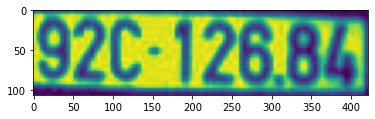

In [110]:
plt.imshow(blurred)
plt.show()

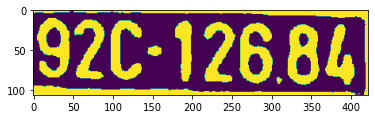

In [111]:
plt.imshow(thresh)
plt.show()

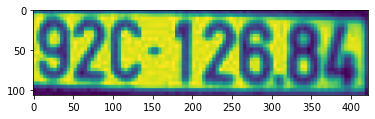

In [112]:
plt.imshow(gray)
plt.show()

In [120]:
# Perform connected components analysis on the thresholded images and
# initialize the mask to hold only the components we are interested in
_, labels = cv2.connectedComponents(thresh)
mask = np.zeros(thresh.shape, dtype="uint8")

In [121]:
# Set lower bound and upper bound criteria for characters
total_pixels = image.shape[0] * image.shape[1]
lower = total_pixels // 70 # heuristic param, can be fine tuned if necessary
upper = total_pixels // 20 # heuristic param, can be fine tuned if necessary

In [122]:
# Loop over the unique components
for (i, label) in enumerate(np.unique(labels)):
	# If this is the background label, ignore it
	if label == 0:
		continue
 
	# Otherwise, construct the label mask to display only connected component
	# for the current label
	labelMask = np.zeros(thresh.shape, dtype="uint8")
	labelMask[labels == label] = 255
	numPixels = cv2.countNonZero(labelMask)
 
	# If the number of pixels in the component is between lower bound and upper bound, 
	# add it to our mask
	if numPixels > lower and numPixels < upper:
		mask = cv2.add(mask, labelMask)

In [123]:
print(mask)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<function matplotlib.pyplot.show(close=None, block=None)>

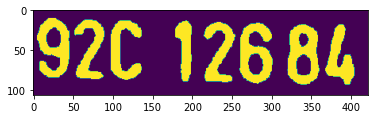

In [124]:
plt.imshow(mask)
plt.show

In [125]:
# Find contours and get bounding box for each contour
cnts, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boundingBoxes = [cv2.boundingRect(c) for c in cnts]

In [126]:
# Sort the bounding boxes from left to right, top to bottom
# sort by Y first, and then sort by X if Ys are similar
def compare(rect1, rect2):
    if abs(rect1[1] - rect2[1]) > 10:
        return rect1[1] - rect2[1]
    else:
        return rect1[0] - rect2[0]
boundingBoxes = sorted(boundingBoxes, key=functools.cmp_to_key(compare) )



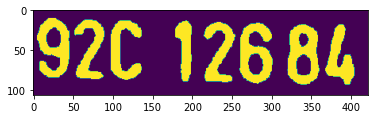

number box: 8


In [133]:
plt.imshow(mask)
plt.show()
print('number box:', len(boundingBoxes))

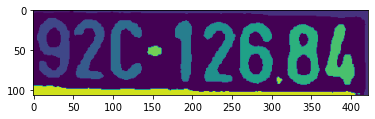

In [136]:
plt.imshow(labels)

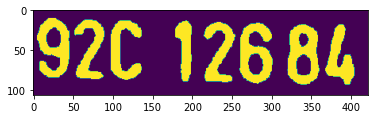

In [138]:
plt.imshow(mask)

In [146]:
len(cnts)

8